## Set up the Environment

In [1]:
!pip install -Uqq fastbook
!git clone https://github.com/srinisriram/NESSP_PROJECT.git

fatal: destination path 'NESSP_PROJECT' already exists and is not an empty directory.


In [2]:
from fastbook import *
from fastai.vision.widgets import *

## Load the Dataset

In [3]:
# Set all constants


In [4]:
model_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [5]:
path = 'NESSP_PROJECT/Mask_Detector/Training/dataset'

In [6]:
dls = model_data.dataloaders(path)

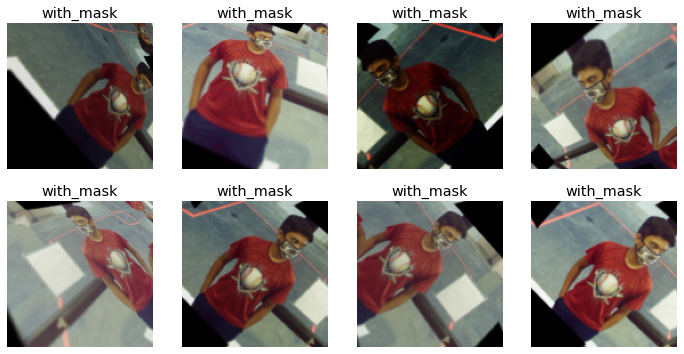

In [7]:
model_aug = model_data.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = model_aug.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Train the Model

In [8]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy, error_rate])

In [9]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.107091,0.020410,0.995860,0.004140,00:13


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.040882,0.004778,0.999540,0.000460,00:17
1,0.026270,0.004776,0.997240,0.002760,00:17
2,0.008582,0.011567,0.998160,0.001840,00:17
3,0.012891,0.009205,0.998160,0.001840,00:17


## Validate Results

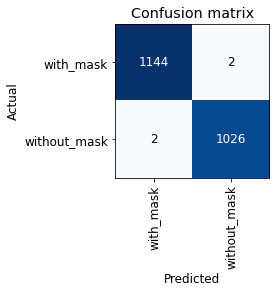

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

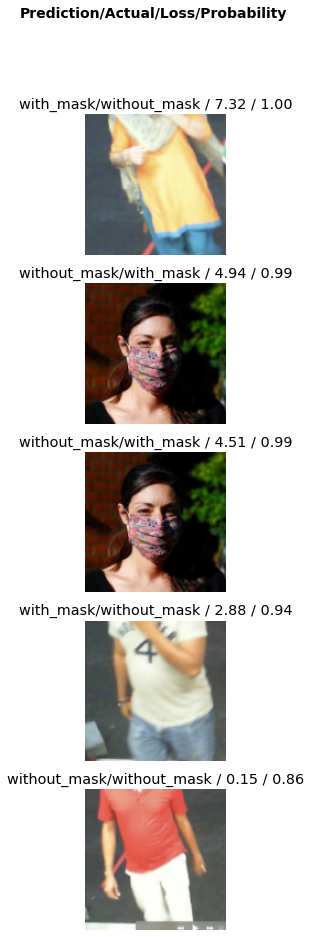

In [11]:
interp.plot_top_losses(5, nrows=5)

In [12]:
interp.print_classification_report()

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00      1146
without_mask       1.00      1.00      1.00      1028

    accuracy                           1.00      2174
   macro avg       1.00      1.00      1.00      2174
weighted avg       1.00      1.00      1.00      2174



## Export Model

In [15]:
learn.export("Model_3.pkl")
torch.save(learn, "Pt_Model_3.pt")

## Import the Saved Model

In [43]:
model = load_learner("Model_3.pkl")
# model = torch.load("Pt_Model_3.pt")

## Predict Using the Saved Model

In [21]:
model.predict("NESSP_PROJECT/Mask_Detector/Training/dataset/without_mask/13.jpg")

('without_mask', tensor(1), tensor([1.4804e-07, 1.0000e+00]))

In [48]:
import torch
import torch.onnx

learn = load_learner('Model_3.pkl')
model = learn.model.eval()
image_sz = 128
dummy_data = torch.randn(1, 3, image_sz, image_sz)
dummy_input = torch.autograd.Variable(dummy_data)

output_model_name = 'onnx_mask_detector.onnx'
input_name = 'image'
output_name = 'warn'

torch.onnx.export(model, dummy_input, output_model_name, input_names = [input_name], output_names = [output_name])

In [50]:
!pip3 install onnx

     |████████████████████████████████| 14.5 MB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 9.4 MB/s eta 0:00:01


In [51]:
import onnx
onnx_model = onnx.load(output_model_name)
onnx.checker.check_model(onnx_model)

In [52]:
model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  